In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.model_selection import train_test_split

In [38]:
dataset_path = "./og-dataset"
output_dir = "./sorted-dataset"
os.makedirs(output_dir, exist_ok=True)

# Create output directories

In [39]:
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split each class folder into train, val, and test

In [40]:
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        continue  # Skip non-folder files

    images = os.listdir(class_path)
    train_files, temp_files = train_test_split(images, test_size=0.3, random_state=42)  # 70% train
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)  # 15% val, 15% test

    # Copy files to respective directories
    for file_name in train_files:
        src = os.path.join(class_path, file_name)
        dest = os.path.join(train_dir, class_name)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)

    for file_name in val_files:
        src = os.path.join(class_path, file_name)
        dest = os.path.join(val_dir, class_name)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)

    for file_name in test_files:
        src = os.path.join(class_path, file_name)
        dest = os.path.join(test_dir, class_name)
        os.makedirs(dest, exist_ok=True)
        shutil.copy(src, dest)

# Image Parameters

In [41]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Splitting dataset into training, validation, and testing sets

In [42]:
train_dir = "./sorted-dataset/train"
val_dir = "./sorted-dataset/validation"
test_dir = "./sorted-dataset/test"

len(train_dir), len(val_dir), len(test_dir)

(22, 27, 21)

# Data Augmentation and Rescaling for Training

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    zoom_range=0.2,       # Zoom in/out by 20%
    validation_split=0.2  # Split into training and validation sets
)

In [44]:
# Preprocessing for validation and test datasets (no augmentation)
test_val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0  # Normalize pixel values to range [0, 1]
)

# Data Generator for Training, Testing and validation

In [45]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Use "binary" for binary classification
)

Found 21320 images belonging to 257 classes.


In [46]:
val_data = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 4578 images belonging to 257 classes.


In [47]:
test_data = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 4709 images belonging to 257 classes.


# Visualizing processed images

In [48]:
import matplotlib.pyplot as plt
def plot_augmented_images(data_gen):
    images, labels = next(data_gen)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

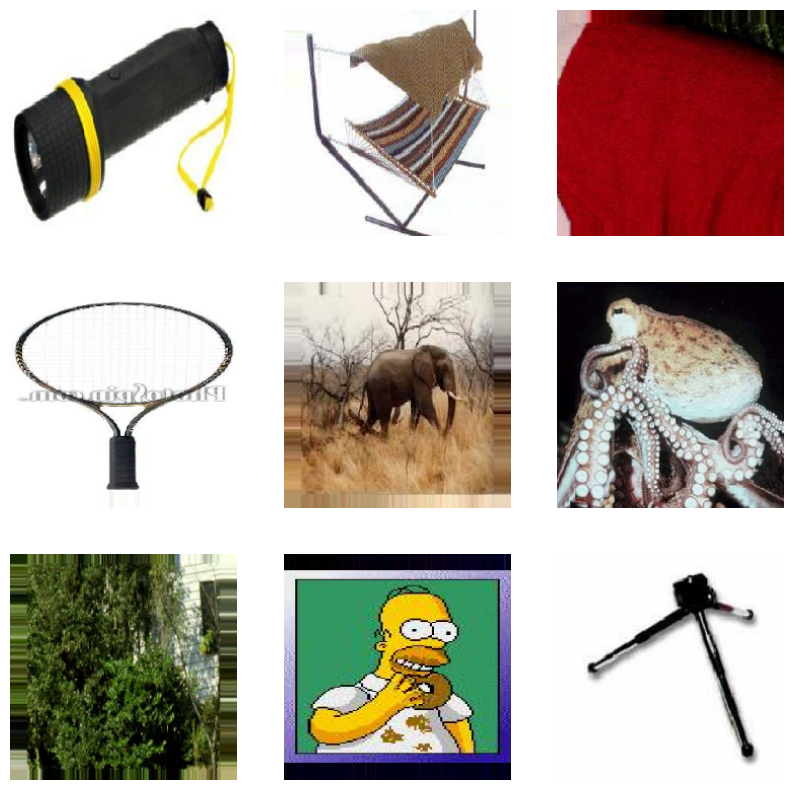

In [49]:
plot_augmented_images(train_data)